# Implementation of Naive Bayes

#### Let’s start the programming by importing essential libraries required

**Numpy** – NumPy is a scientific computing fundamental package in Python. This enables NumPy to work with a wide range of databases with ease and speed.

**pandas** – Python Data Analysis Library. pandas are open-source, BSD-licensed libraries for the Python programming language that provide high-performance, simple-to-use data structures, and data analysis tools.

**matplotlib.pyplot** It is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting. The object-oriented API is recommended for more complex plots.

**sci-kit learn** – It is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

## Social network ads dataset
We are using the Social network ad dataset. The dataset contains the details of users in a social networking site to find whether a user buys a product by clicking the ad on the site based on their salary, age, and gender

#### Importing dataset

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Data shape

In [3]:
data.shape

(400, 5)

### we will use **Age** and **Estimated Salary** Column as features and **Purchased** column as label.

In [4]:
data.iloc[:, [2, 3]].head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [5]:
data.iloc[:, [-1]].tail()

,Purchased
395,1
396,1
397,1
398,0
399,1


In [6]:
x = data.iloc[:, [2, 3]].values
label = data.iloc[:, -1].values

### Train test Split

    We are performing a train test split on our dataset. We are providing the test size as 0.25, that means: 
          => training sample contains 300 training set
          => test sample contains 100 test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, label, test_size = 0.25)

## Feature scaling
Next, we are doing feature scaling to the training and test set of independent variables

The **Standard Scaler** assumes data is normally distributed within each feature and scales them such that the distribution centered around 0, with a standard deviation of 1.

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Training the Naive Bayes model on the training set

**Gaussian Naive Bayes** algorithm is a special type of NB algorithm. It's specifically used when the features have continuous values. It's also assumed that all the features are following a gaussian distribution i.e, normal distribution.

In [10]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

### Let’s predict the test results

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [12]:
dataset = pd.DataFrame({'Prediction': y_pred, 'Actual': y_test})
dataset.tail()

,Prediction,Actual
95,0,0
96,0,0
97,0,0
98,0,0
99,0,1


### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

[[61  4]
 [ 4 31]]


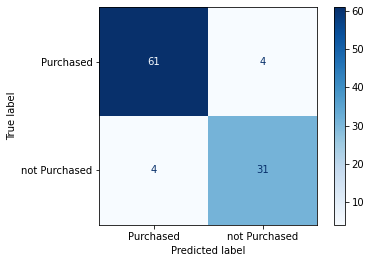

In [13]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                            display_labels=['Purchased',"not Purchased"])


print(disp.confusion_matrix)
plt.show()

### Accuracy of Classifier

In [14]:
ac = accuracy_score(y_test,y_pred)
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100 ,' %')

Accuracy :  92.0  %


# Thank You!